# <center> Description des pipelines - Problématique 1 </center>

In [1]:
from load_data import *
from preprocessing import *
from embedding import *
from item_selection import *
from product_categorization import *
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Save Embedding model

### 1) Load Data

In [2]:
# Chargement du csv avec les colonnes sélectionnées (dans notre cas : prodcategory1-2-3-4 + product family + description)
df = load_data("../../Data/t3_all_fr_prices_posweekly_prod_without_price.csv", columns_to_keep=[0, 1, 2, 3, 4, 13])

In [3]:
df.head(5)

t3_all_fr_prices_posweekly_prod.prodcategory2_seller  \
0                                      Quincaillerie     
1                                                        
2                                        Accessoires     
3                                      Quincaillerie     
4           Peintures, outils et traitement des murs     

  t3_all_fr_prices_posweekly_prod.prodcategory3_seller  \
0                                 Colles et adhésifs     
1                                                        
2                   Accessoires pour lave-vaisselles     
3                                 Colles et adhésifs     
4                   Peintures, teintures et solvants     

  t3_all_fr_prices_posweekly_prod.prodcategory4_seller  \
0                                 Colles à carrelage     
1                                                        
2                                                        
3                                             Mastic     
4                                              Cires     

  t3_all_fr_prices_posweekly_prod.prodcategory1_seller  \
0                                          Bricolage     
1                                                        
2                                Gros électroménager     
3                                          Bricolage     
4                                          Bricolage     

  t3_all_fr_prices_posweekly_prod.productfamily_seller  \
0                                 Colles à carrelage     
1                                                        
2                                                        
3                                             Mastic     
4                                              Cires     

  t3_all_fr_prices_posweekly_prod.productseller_name  
0  SikaCeram Xtra - Colle à carrelage intérieur e...  
1  Ariston 3200362 scaldabagno elettrico PRO 100 H/3  
2  AEG Panier À Couverts Lave-vaisselle Cage & Ha...  
3              Colle-mastic pour joints d'étanchéité  
4  Sikagard Protection Sol MAT - Imperméabilisant...

### 2) Preprocessing

In [4]:
# Preprocessing
stop_words = union_set("../../Data/stop_words.txt", "../../Data/marques.txt") # Specify stop words needed
df_process = preprocessing(df, df.columns, stop_words, tag_dir="C:/TreeTagger") # Put treetagger library directory

In [5]:
df_process.head(5)

t3_all_fr_prices_posweekly_prod.prodcategory2_seller_clean  \
0                                      quincaillerie           
1                                                              
2                                         accessoire           
3                                      quincaillerie           
4                      mur peinture traitement outil           

  t3_all_fr_prices_posweekly_prod.prodcategory3_seller_clean  \
0                                      adhesif colle           
1                                                              
2                          vaisselle accessoire lave           
3                                      adhesif colle           
4                          teinture peinture solvant           

  t3_all_fr_prices_posweekly_prod.prodcategory4_seller_clean  \
0                                    carrelage colle           
1                                                              
2                                                              
3                                             mastic           
4                                               cire           

  t3_all_fr_prices_posweekly_prod.prodcategory1_seller_clean  \
0                                          bricolage           
1                                                              
2                                electromenager gros           
3                                          bricolage           
4                                          bricolage           

  t3_all_fr_prices_posweekly_prod.productfamily_seller_clean  \
0                                    carrelage colle           
1                                                              
2                                                              
3                                             mastic           
4                                               cire           

  t3_all_fr_prices_posweekly_prod.productseller_name_clean  
0  exterieur carreau sikaceram carrelage max coll...        
1                    pro elettrico heure scaldabagno        
2  vaisselle laver couvercle cage handle comparti...        
3                      joint mastic colle etancheite        
4  effet sol protection impermeabiliser mat sikagard

###  3) Embedding

In [4]:
# Embedding
embedding(df_process, '../../models/tfidf_top500_base', '../../models/nmf_250topics_base', mode='save') # Saving tf-idf / nmf models

C:\Users\JN\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\JN\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\JN\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

## Save Classifier model

### 1) Load Data

In [13]:
# Chargement du csv avec les colonnes sélectionnées (dans notre cas : prodcategory1-2-3-4 + product family + description)
df_train = load_data("../../Data/df_train.csv")

In [14]:
df_train.head(5)

Unnamed: 0   productfamily_seller   prodcategory4_seller  \
0           0     Colles à carrelage     Colles à carrelage   
1           3                 Mastic                 Mastic   
2           4                  Cires                  Cires   
3           6      Perceuse visseuse              Perceuses   
4           7  Produits d étanchéité  Produits d étanchéité   

              prodcategory3_seller                     prodcategory2_seller  \
0               Colles et adhésifs                            Quincaillerie   
1               Colles et adhésifs                            Quincaillerie   
2  Peintures teintures et solvants  Peintures outils et traitement des murs   
3        Outillage électroportatif      Outillage à main et électroportatif   
4               Colles et adhésifs                            Quincaillerie   

  prodcategory1_seller                                 productseller_name  \
0            Bricolage  SikaCeram Xtra   Colle à carrelage intérieur e...   
1            Bricolage              Colle mastic pour joints d étanchéité   
2            Bricolage  Sikagard Protection Sol MAT   Imperméabilisant...   
3            Bricolage  Perceuse visseuse RYOBI 18V OnePlus   1 batter...   
4            Bricolage  Sika Multiseal   Bande d étanchéité autocollan...   

   label  
0     27  
1     27  
2     27  
3     62  
4     27

### 2) Preprocessing

In [15]:
# Preprocessing
stop_words = union_set("../../Data/stop_words.txt", "../../Data/marques.txt") # Specify stop words needed
df_process_train = preprocessing(df_train.iloc[:, 1:-1], df_train.columns[1:-1], stop_words, tag_dir="C:/TreeTagger") # Put treetagger library directory

In [16]:
df_process_train.head(5)

productfamily_seller_clean prodcategory4_seller_clean  \
0            carrelage colle            carrelage colle   
1                     mastic                     mastic   
2                       cire                       cire   
3   perceur visseur|visseuse                    perceur   
4         produit etancheite         produit etancheite   

  prodcategory3_seller_clean      prodcategory2_seller_clean  \
0              adhesif colle                   quincaillerie   
1              adhesif colle                   quincaillerie   
2  teinture peinture solvant   mur peinture traitement outil   
3  outillage electroportatif  main electroportatif outillage   
4              adhesif colle                   quincaillerie   

  prodcategory1_seller_clean  \
0                  bricolage   
1                  bricolage   
2                  bricolage   
3                  bricolage   
4                  bricolage   

                            productseller_name_clean  
0  exterieur carreau sikaceram carrelage max coll...  
1                      joint mastic colle etancheite  
2  effet sol protection impermeabiliser mat sikagard  
3  rcd perceur oneplus visseur|visseuse chargeur ...  
4  etancheite autocollant bander terre dechirure ...

### 3) Embedding

In [17]:
# Embedding
X, vocab = embedding(df_process_train, '../../models/tfidf_top500_base', '../../models/nmf_250topics_base_from_tfidf500', mode='load') # Saving tf-idf / nmf models

C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator NMF from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [18]:
vectorizer = joblib.load('../../models/tfidf_top500_base')
nmf = joblib.load('../../models/nmf_250topics_base_from_tfidf500')

C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator NMF from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Train set / test set constitution and classification model

In [20]:
# retrait des produits ambigus 
y = df_train.iloc[:, -1].values
selector = ItemSelector()
X_sel, y_sel = selector.fit_transform(X, y, df_process_train.index)
X_train, X_test, y_train, y_test = train_test_split(X_sel, y_sel, test_size=0.2, random_state=50, stratify=y_sel)

In [21]:
categorization(X_train, y_train, mode='training', path='../../models/categorization_model', n_jobs=-1)

## Prediction

In [22]:
# Get predictions hard and soft
prediction, soft_proba = categorization(X_test, mode='prediction', thresholding='default', path='../../models/categorization_model')

## Metrics

In [31]:
print("accuray score : ", round(accuracy_score(y_test, prediction),4))

accuray score :  0.9191


In [32]:
print("F1 score : ", round(f1_score(y_test, prediction, average="macro"),4))

F1 score :  0.8591


C:\Users\Pascal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
# On récupère les labels dans une liste
list_labels = np.unique(y_train)

In [27]:
def roc_one_vs_rest(label, y, y_softpred, list_labels):
    lb = LabelBinarizer()
    lb.fit([label])
    y_binary = lb.transform(y)
    index = np.argwhere(list_labels==label)
    if len(index) != 0:
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_binary, y_softpred[:, index[0][0]])
        roc_auc = auc(fpr, tpr)
        # Plot of a ROC curve for a specific class
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        return fpr, tpr

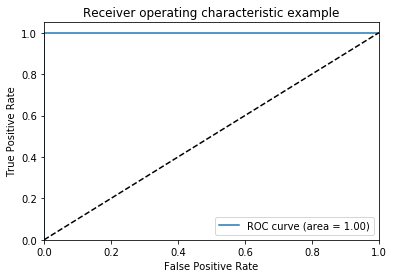

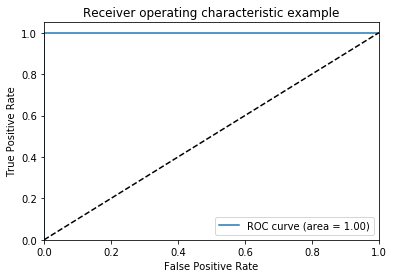

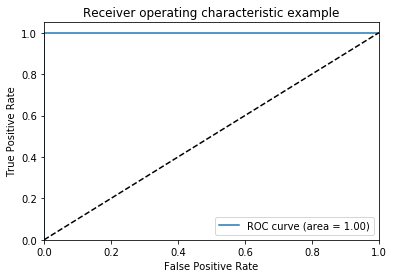

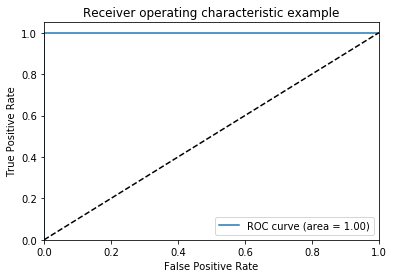

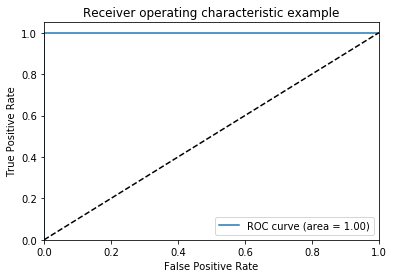

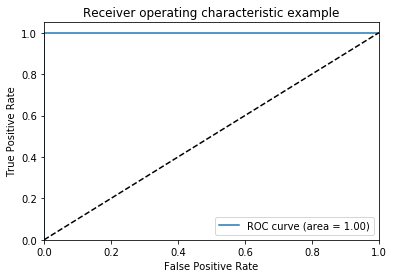

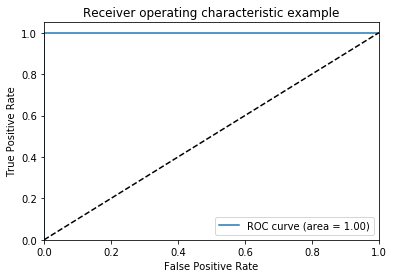

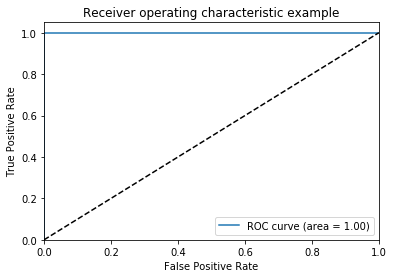

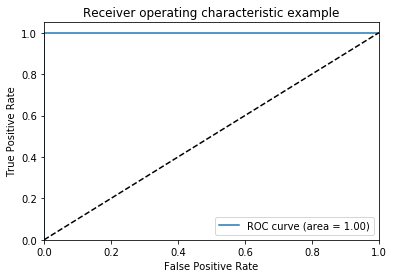

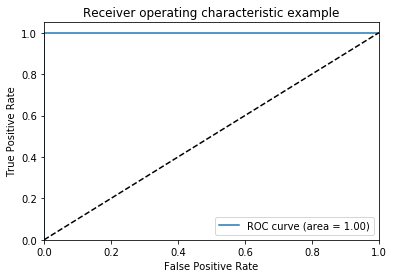

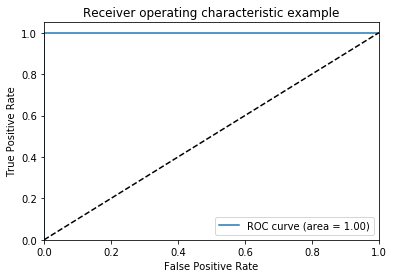

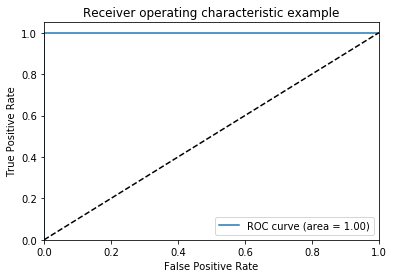

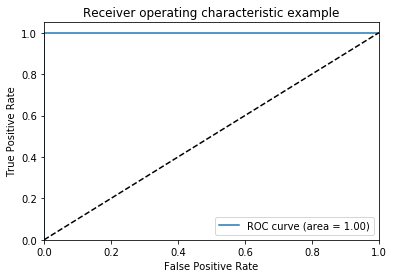

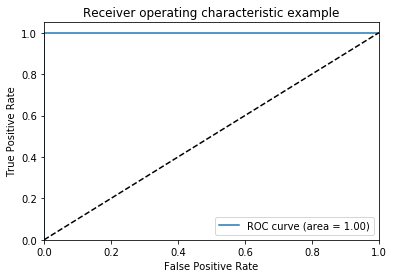

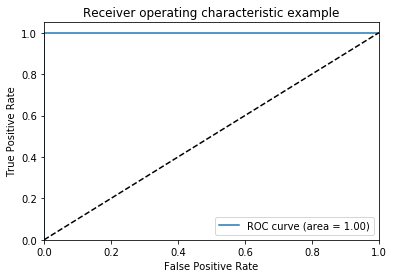

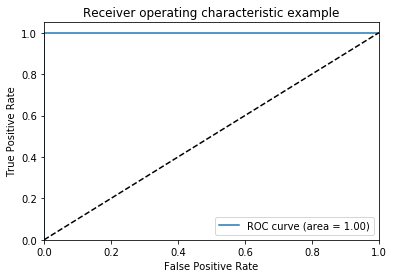

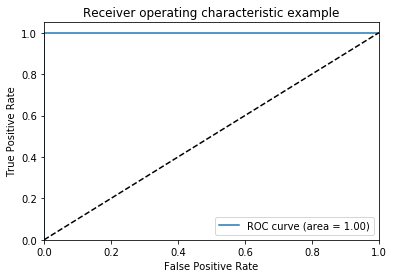

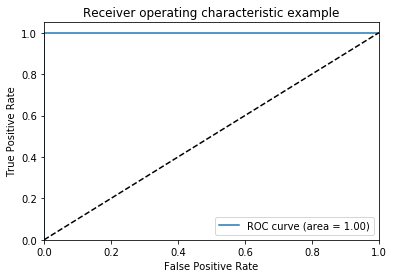

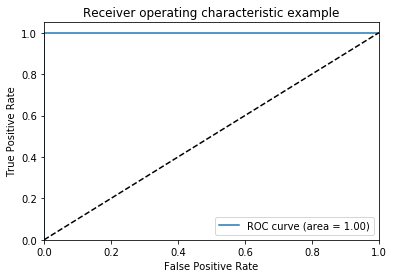

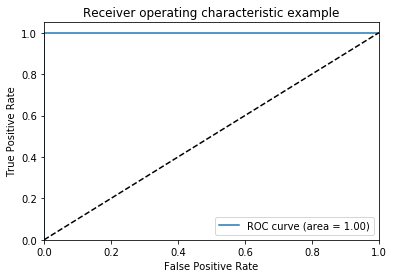

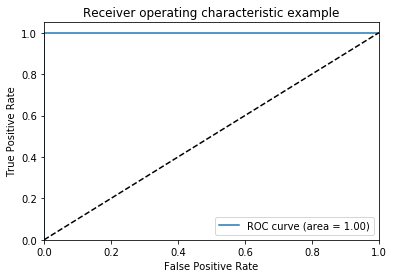

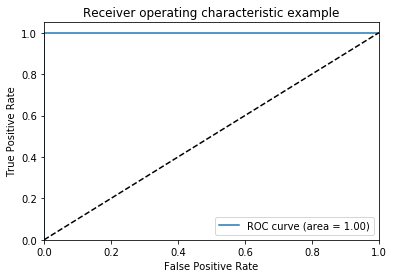

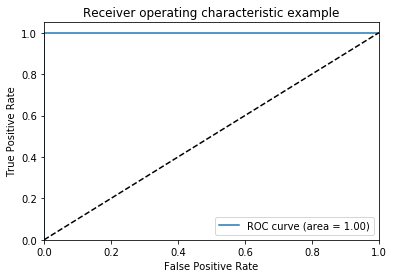

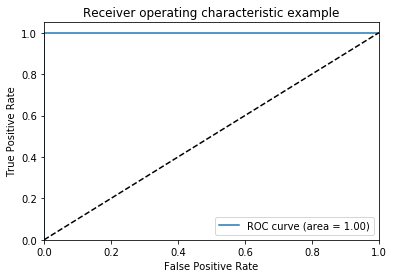

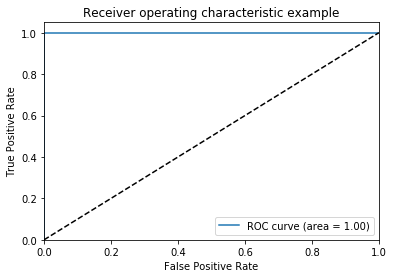

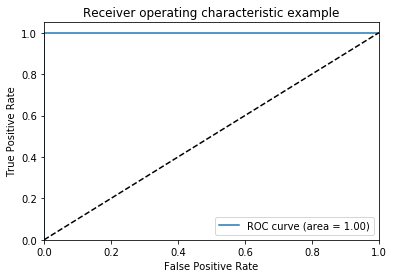

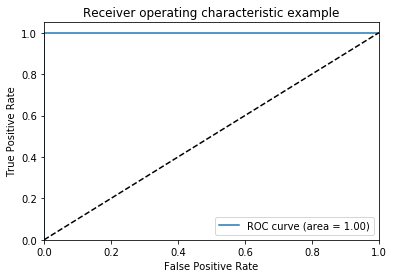

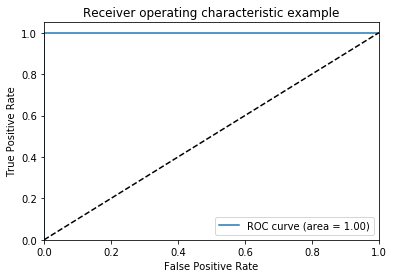

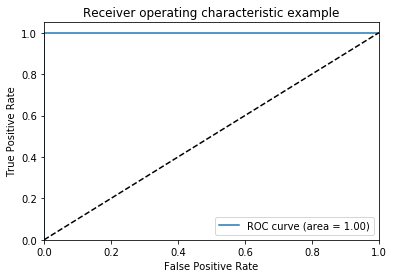

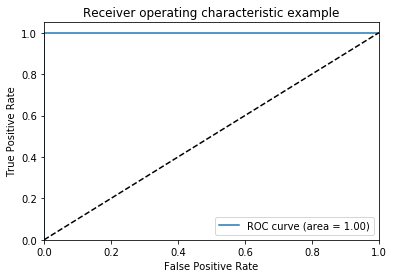

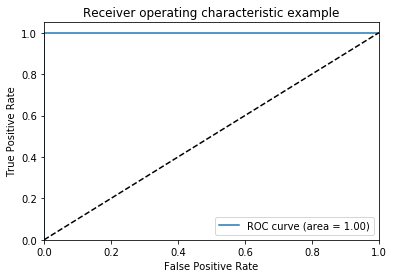

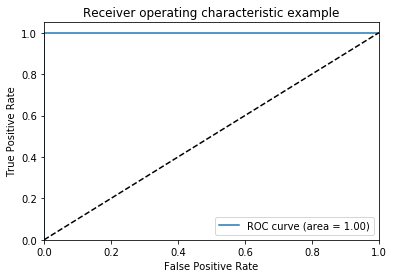

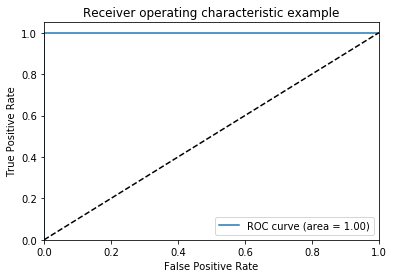

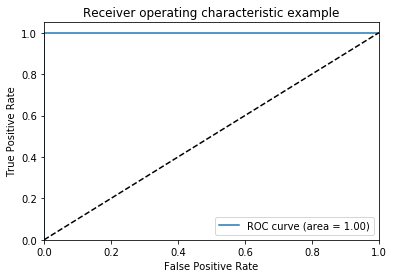

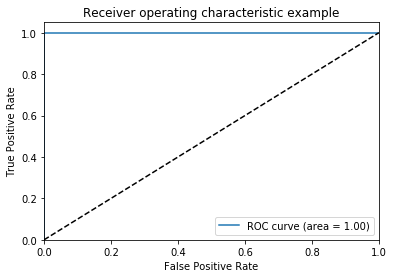

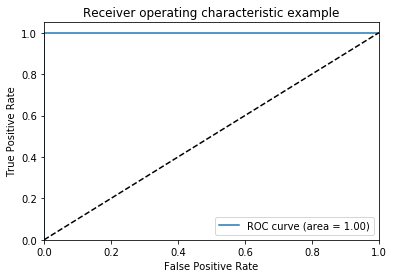

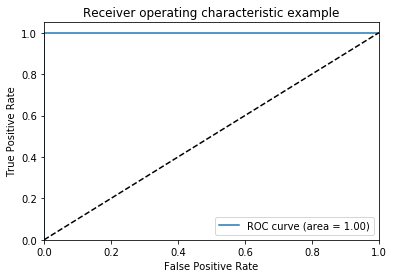

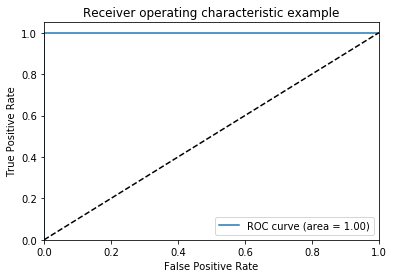

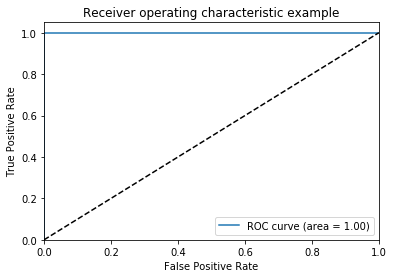

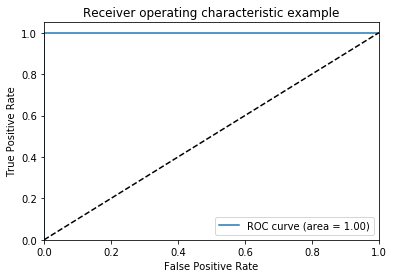

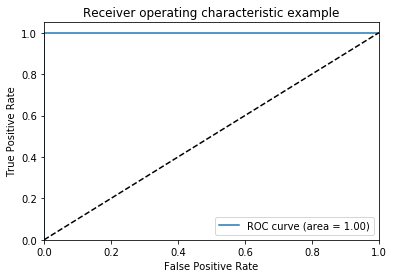

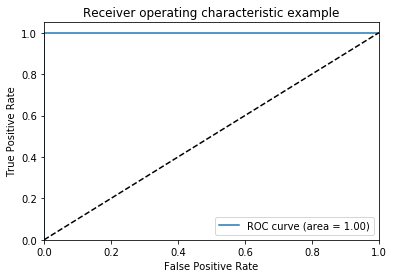

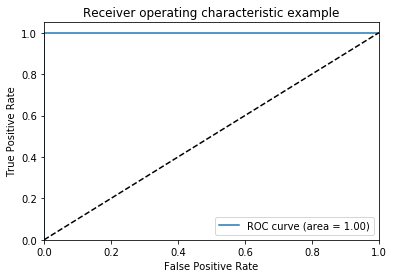

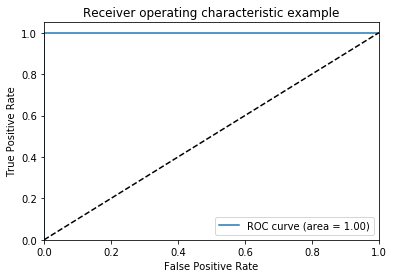

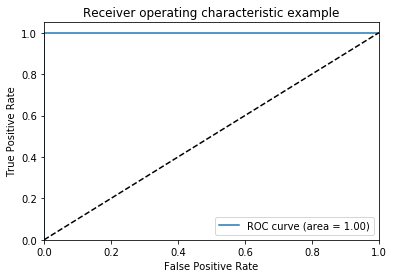

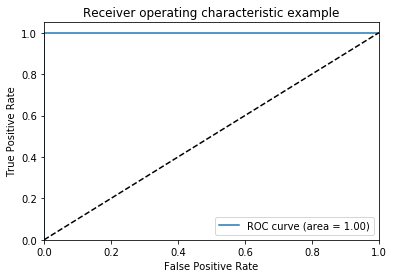

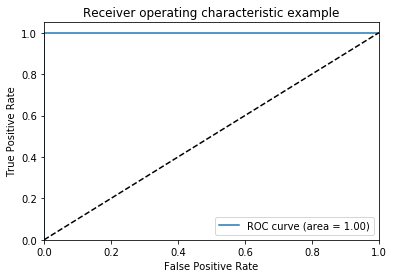

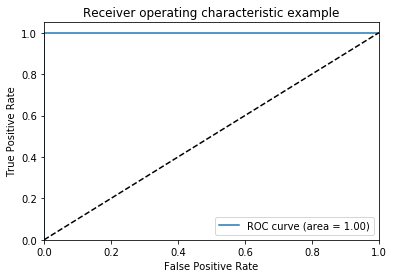

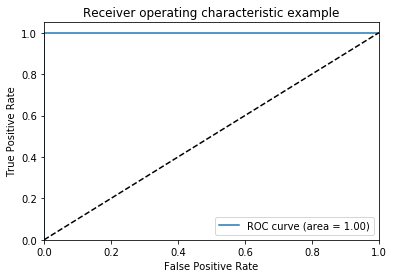

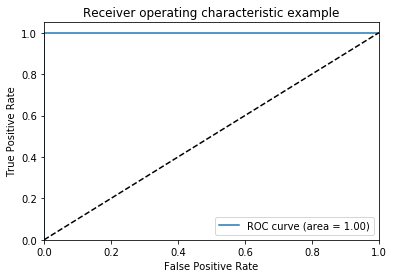

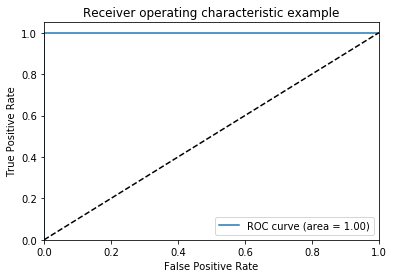

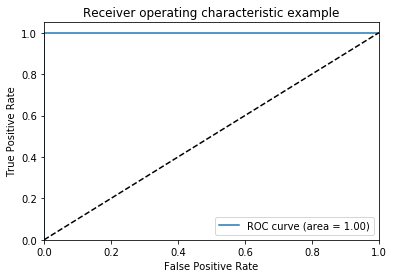

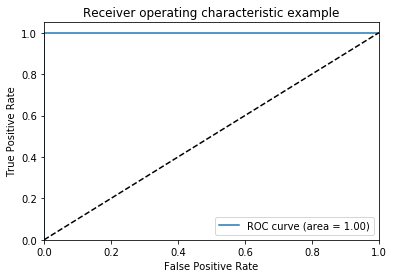

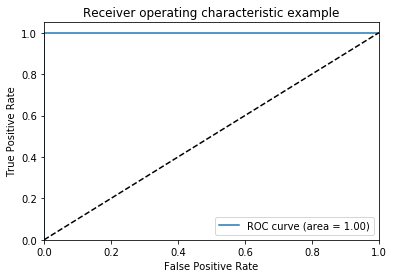

In [29]:
# On trace les courbes ROC avec calcul du AUC
for i in range(109):    
    roc_one_vs_rest(i, prediction, soft_proba, list_labels)